
# <span style="color:#0b486b">Facial Recognition Model</span>


---

In [1]:
from sklearn import datasets

from sklearn import datasets
import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Importing Packages

In [2]:
# Display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

 You may need to install the *Pillow* package first by running the following command in the conda prompt.

In [3]:
# This will download the dataset to your computer
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=80, resize=0.4)

In [4]:
# store features in variable X and the label in variable y

X, y = faces.data, faces.target

---

In [5]:
print(faces.DESCR)


.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [6]:
# Number of data points
X.shape


(1140, 1850)

In [7]:


# printing out the number of classes, and corresponding name of each class, each class refers to a person in the dataset
class_ids=np.unique(y)

n_classes = len(np.unique(y))
print(n_classes)
print(class_ids)

print(faces.target_names)





5
[0 1 2 3 4]
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


There are 5 unique classes. 0 corresponds with Colin Powell and 4 with Tony Blair.



Facial regonition is a regression based classification problem in this example. Three machine learning algorithms that are suitable are Linear Regression, Linear Discrimnant Analysis, and Support Vector Machine


 

In [8]:
from sklearn.model_selection import train_test_split

# split into a training and testing set, 70% train, 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [9]:
print(f"Number of training samples:\t{len(X_train)}")
print(f"Number of testing samples:\t{len(X_test)}")

Number of training samples:	798
Number of testing samples:	342


---

In [10]:
# Using Scikit-Learn to conduct a PCA for dimensionality reduction
from sklearn.pipeline import Pipeline
from sklearn import decomposition
pca = decomposition.PCA()

pipe_face_recognition = Pipeline(steps=[('pca', pca)])
pipe_face_recognition.set_params(pca__n_components=80)




Pipeline(steps=[('pca', PCA(n_components=80))])

In [11]:
# Using Scikit-Learn logistc regression for classification
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [12]:
pipe_face_recognition.steps.append(('logistic', logistic))
print(pipe_face_recognition)

Pipeline(steps=[('pca', PCA(n_components=80)),
                ('logistic',
                 LogisticRegression(multi_class='ovr', n_jobs=1, penalty='l1',
                                    solver='liblinear'))])


In [13]:
pipe_face_recognition.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=80)),
                ('logistic',
                 LogisticRegression(multi_class='ovr', n_jobs=1, penalty='l1',
                                    solver='liblinear'))])

In [14]:
# Performance metrics for Logistic Regression model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_prediction=pipe_face_recognition.predict(X_test )

rec=recall_score(y_test,y_prediction, average='macro')
pre=precision_score(y_test,y_prediction, average='macro')
acc=accuracy_score(y_test,y_prediction)
f1=f1_score(y_test,y_prediction, average='macro')

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Logistic Regression\t{:f}\t{:f}\t{:f}\t{:f}".format(acc,pre,rec,f1))

			Accuracy	Precision	Recall		F-score
Logistic Regression	0.786550	0.749543	0.694943	0.712007


In [15]:
# changing the number of components to 30 
pipe_face_recognition.set_params(pca__n_components=30)


pipe_face_recognition.fit(X_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=30)),
                ('logistic',
                 LogisticRegression(multi_class='ovr', n_jobs=1, penalty='l1',
                                    solver='liblinear'))])

In [16]:
# Performance metrics for logistic regression with 30 components

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_prediction=pipe_face_recognition.predict(X_test )

rec=recall_score(y_test,y_prediction, average='macro')
pre=precision_score(y_test,y_prediction, average='macro')
acc=accuracy_score(y_test,y_prediction)
f1=f1_score(y_test,y_prediction, average='macro')

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Logistic Regression\t{:f}\t{:f}\t{:f}\t{:f}".format(acc,pre,rec,f1))


			Accuracy	Precision	Recall		F-score
Logistic Regression	0.558480	0.520822	0.402732	0.424039


In [17]:
# Using repeated random train split  , 10 runs with 60/40 split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

rs = ShuffleSplit(n_splits=10, test_size=.40)
cv_scores = cross_validate(logistic, X_train, y_train, scoring=metrics, cv=rs, n_jobs=-1)



In [18]:
recmean=cv_scores['test_recall_macro'].mean() 
premean=cv_scores['test_precision_macro'].mean() 
accmean=cv_scores['test_accuracy'].mean()
f1mean=cv_scores['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Scores Regression\t{:f}\t{:f}\t{:f}\t{:f}".format(accmean,premean,recmean,f1mean))

			Accuracy	Precision	Recall		F-score
Mean Scores Regression	0.824375	0.818204	0.736914	0.764106


In [19]:
recstd=cv_scores['test_recall_macro'].std() 
prestd=cv_scores['test_precision_macro'].std() 
accstd=cv_scores['test_accuracy'].std()
f1std=cv_scores['test_f1_macro'].std()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Std Scores Regression\t{:f}\t{:f}\t{:f}\t{:f}".format(accstd,prestd,recstd,f1std))

			Accuracy	Precision	Recall		F-score
Std Scores Regression	0.019605	0.011786	0.029646	0.023834


In [20]:
# Performance using K-fold cross-validation with k=10 
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=False, random_state=None)
cv_scoresK = cross_validate(logistic, X_train, y_train, scoring=metrics, cv=kf, n_jobs=-1)

recmeanK=cv_scoresK['test_recall_macro'].mean() 
premeanK=cv_scoresK['test_precision_macro'].mean() 
accmeanK=cv_scoresK['test_accuracy'].mean()
f1meanK=cv_scoresK['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Scores K-fold\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeanK,premeanK,recmeanK,f1meanK))

			Accuracy	Precision	Recall		F-score
Mean Scores K-fold	0.870965	0.854200	0.811712	0.827646




|   |Recall   | Precision  |  Accuracy |F-measure   |
|---|---|---|---|---|
|  Logistic Regression Pipe | 0.6713  | 0.7323  | 0.7573  |0.6946   |
|  Shuffle Split|  0.7803  |  0.8058 | 0.8393  |  0.7898 |
|  K-fold Cross | 0.80  | 0.81  | 0.84  | 0.79  |



The best performance was with the K-fold cross validation which was better in all measures. The fact that k-fold usese repeated sub sampling and that all observations are used for training and validation has improved accuracy.


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results


In [22]:
# Logistc regression model using l1 regulaization, pca dimesion = 30, runs =10 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

def ml_custom(X,y,model, scoring_metrics, pca_dim, n_runs):
   
    
    estimators = []
    estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    estimators.steps.append(('logistic', LogisticRegression(penalty='l1')))
    model = Pipeline(estimators)
    estimators.append(model)
    kfold= KFold(n_splits=n_runs)
    
    try:
        results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metrics, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

In [23]:
# Facial recognition has a high-dimensional data problem. We can use PCA to redeuce the number of dimensions. Using a list of dim {10, 20, 30,..., 150}

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pca = decomposition.PCA()

pipe_face_recognition = Pipeline(steps=[('pca', pca)])
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

pipe_face_recognition.steps.append(('logistic', logistic))

dim_range = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
dimscores = []

for d in dim_range:
    
    pipe_face_recognition.fit(X_train, y_train)
    pipe_face_recognition.set_params(pca__n_components=d)
    y_prediction=pipe_face_recognition.predict(X_test)
    newscores = accuracy_score(y_test,y_prediction)
    dimscores.append(newscores)
    
    

print(dimscores)




[0.8567251461988304, 0.47368421052631576, 0.5526315789473685, 0.5526315789473685, 0.6111111111111112, 0.6695906432748538, 0.7280701754385965, 0.7719298245614035, 0.7923976608187134, 0.8011695906432749, 0.7982456140350878, 0.8245614035087719, 0.8187134502923976, 0.8304093567251462, 0.847953216374269]


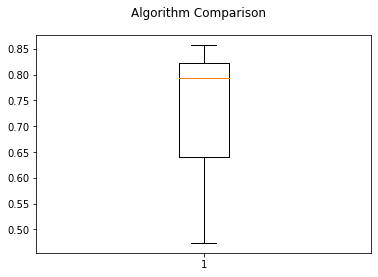

In [25]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(dimscores)
plt.show()

The dimension for PCA that gives the best accuracy is 80 dimensions.

In [28]:
# Fixing PCA n components to = 80

from sklearn.decomposition import PCA

pcanew = PCA(n_components=80)
pcanew.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
# Comparing the performance among linear models using 80 dimensions
#      Logistc Regression
#      Linear Discriminant Analysis 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
logistic = LogisticRegression(n_jobs=-1)
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv_scores = cross_validate(logistic, X_train, y_train, scoring=metrics, cv=None, n_jobs=-1)

recmeanK=cv_scores['test_recall_macro'].mean() 
premeanK=cv_scores['test_precision_macro'].mean() 
accmeanK=cv_scores['test_accuracy'].mean()
f1meanK=cv_scores['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Score Logistic\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeanK,premeanK,recmeanK,f1meanK))

clf = LinearDiscriminantAnalysis()
cv_scores1 = cross_validate(clf, X_train, y_train, scoring=metrics, cv=None, n_jobs=-1)

recmeanC=cv_scores1['test_recall_macro'].mean() 
premeanC=cv_scores1['test_precision_macro'].mean() 
accmeanC=cv_scores1['test_accuracy'].mean()
f1meanC=cv_scores1['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Scores Discrim\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeanC,premeanC,recmeanC,f1meanC))





			Accuracy	Precision	Recall		F-score
Mean Score Logistic	0.827066	0.799758	0.782841	0.789474
			Accuracy	Precision	Recall		F-score
Mean Scores Discrim	0.785736	0.749533	0.754186	0.748832


The logistic regression model performs better than the Linear Discriminant Analysis. In all measures.

In [43]:
# Comparing the performance among non-linear models using 80 dimensions
#      Support Vector Machine (SVM)
#      Neural Networks 



from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clfsvc= SVC()

cv_scoressvc = cross_validate(clfsvc, X_train, y_train, scoring=metrics, cv=None, n_jobs=-1)

recmeansvc=cv_scoressvc['test_recall_macro'].mean() 
premeansvc=cv_scoressvc['test_precision_macro'].mean() 
accmeansvc=cv_scoressvc['test_accuracy'].mean()
f1meansvc=cv_scoressvc['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Score Support\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeansvc,premeansvc,recmeansvc,f1meansvc))

clfMLP = MLPClassifier()

cv_scoresMLP = cross_validate(clfMLP, X_train, y_train, scoring=metrics, cv=None, n_jobs=-1)

recmeanMLP=cv_scoresMLP['test_recall_macro'].mean() 
premeanMLP=cv_scoresMLP['test_precision_macro'].mean() 
accmeanMLP=cv_scoresMLP['test_accuracy'].mean()
f1meanMLP=cv_scoresMLP['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Score Classif\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeanMLP,premeanMLP,recmeanMLP,f1meanMLP))

			Accuracy	Precision	Recall		F-score
Mean Score Support	0.458651	0.091730	0.200000	0.125774
			Accuracy	Precision	Recall		F-score
Mean Score Classif	0.510167	0.291199	0.320145	0.287506


The MLP Classifier is more accurate in every measure. 

In [47]:

# Comparing the performance among non-parametric and probabilistic models with 80 dimensions
#      Random Forest Classifier
#      K-NN Classifer
#      GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfforest = RandomForestClassifier()

cv_scoresforest = cross_validate(clfforest, X_train, y_train, scoring=metrics, cv=None, n_jobs=-1)

recmeanforest=cv_scoresforest['test_recall_macro'].mean() 
premeanforest=cv_scoresforest['test_precision_macro'].mean() 
accmeanforest=cv_scoresforest['test_accuracy'].mean()
f1meanforest=cv_scoresforest['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Score Forest\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeanforest,premeanforest,recmeanforest,f1meanforest))

clfKneigh = KNeighborsClassifier()

cv_scoresKneigh = cross_validate(clfKneigh, X_train, y_train, scoring=metrics, cv=None, n_jobs=-1)

recmeanKneigh=cv_scoresKneigh['test_recall_macro'].mean() 
premeanKneigh=cv_scoresKneigh['test_precision_macro'].mean() 
accmeanKneigh=cv_scoresKneigh['test_accuracy'].mean()
f1meanKneigh=cv_scoresKneigh['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Score Kneigh\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeanKneigh,premeanKneigh,recmeanKneigh,f1meanKneigh))


clfguass = GaussianNB()

cv_scoresguass = cross_validate(clfguass, X_train, y_train, scoring=metrics, cv=None, n_jobs=-1)

recmeanguass=cv_scoresguass['test_recall_macro'].mean() 
premeanguass=cv_scoresguass['test_precision_macro'].mean() 
accmeanguass=cv_scoresguass['test_accuracy'].mean()
f1meanguass=cv_scoresguass['test_f1_macro'].mean()

print("\t\t\tAccuracy\tPrecision\tRecall\t\tF-score")
print("Mean Score Guass\t{:f}\t{:f}\t{:f}\t{:f}".format(accmeanguass,premeanguass,recmeanguass,f1meanguass))



			Accuracy	Precision	Recall		F-score
Mean Score Forest	0.595206	0.533858	0.428514	0.439805
			Accuracy	Precision	Recall		F-score
Mean Score Kneigh	0.598998	0.563443	0.427152	0.432219
			Accuracy	Precision	Recall		F-score
Mean Score Guass	0.520107	0.475424	0.489001	0.465810


The KNeighbors and Random Forest Classifier are the most accurate. However the Guassian has the best recall and f-score.


    
|   |Recall   | Precision  |  Accuracy |F-measure   |
|---|---|---|---|---|
|  Logistic Regression |  0.782841 | 0.799758  |0.827066   | 0.789474  |
|  LDA |  0.754186  | 0.749533  | 0.785736 | 0.748832  |
|  SVM | 0.200000  |  0.091730 |  0.458651 | 0.125774  |
|  Neural Networks |  0.320145 | 0.291199  |  0.510167 |  0.287506 |
|  Random Forest |  0.428514 | 0.533858  | 0.595206  | 0.439805  |
|  K-NN |  0.427152 | 0.563443  |  0.598998 |  0.432219 |
|  GaussianNB | 0.489001  | 0.475424  |  0.520107 |  0.465810 | |



The logistc regression model is the most accurate. It performs the best on every measure. Second is the LDA. The rest of the models all perform quite poorly compared to the LDA and logistc regression model. Particulary the Support Vector Machine. You can see that the linear models perform much better than the non-linear and probablistic models. From this assignment you can conclude that face regonition is a linear problem and it is best to create a linear model to get the best performance. Also learnt was finding the right number of dimensions. Facial recognition databases could contain millions of photos so reducing the dimensions and still keep most of the variance is a good way of improving processing performance. Also learnt is there are a number of ways to measure the performance of a model not just accuracy.